# AmirAliArbab - 9918113

## Question 1

In [1]:
# import libararies
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
path = "./data/car_data.csv"
df = pd.read_csv(path)

### Visualize Data 

In [3]:
# show first 5 row
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


<AxesSubplot: ylabel='Frequency'>

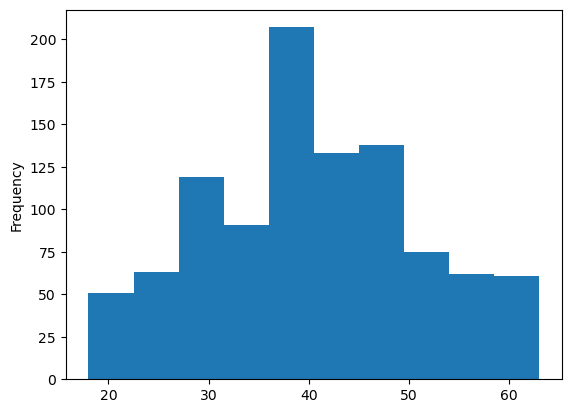

In [4]:
# histogram for Age column
df.Age.plot(kind="hist")

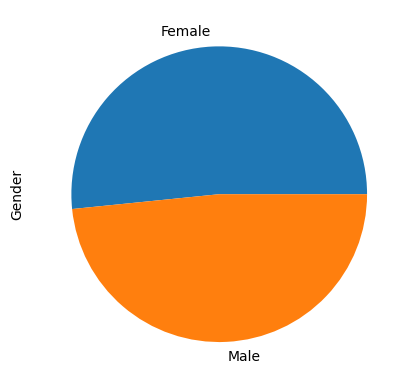

In [5]:
# pie chart for Gender column
df.Gender.value_counts().plot(kind="pie");

### Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [7]:
# Turn the Gender column to numerical values 
df = pd.concat([df.drop(columns="Gender") , pd.get_dummies(df["Gender"] ,prefix="Gender" , prefix_sep="_")] , axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User ID        1000 non-null   int64
 1   Age            1000 non-null   int64
 2   AnnualSalary   1000 non-null   int64
 3   Purchased      1000 non-null   int64
 4   Gender_Female  1000 non-null   uint8
 5   Gender_Male    1000 non-null   uint8
dtypes: int64(4), uint8(2)
memory usage: 33.3 KB


In [9]:
df.head(100)

,User ID,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
0,385,35,20000,0,0,1
1,681,40,43500,0,0,1
2,353,49,74000,0,0,1
3,895,40,107500,1,0,1
4,661,25,79000,0,0,1
...,...,...,...,...,...,...
95,485,33,151500,1,1,0
96,960,45,75500,1,0,1
97,233,26,17000,0,1,0
98,191,30,87000,0,0,1


### Drop User ID

In [10]:
df = df.drop(columns=["User ID"])

### Split Data

For preventing `Data Leakage` we first should split data into `train` & `test` sets then apply `fit`on train and then apply `Transform` on `train` and `test` sets . 

In [11]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns=["Purchased"]),df.Purchased , test_size=0.2  , random_state=42)
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((800, 4), (200, 4), (800,), (200,))

In [12]:
x_train

,Age,AnnualSalary,Gender_Female,Gender_Male
29,38,147500,1,0
535,59,24500,1,0
695,35,91000,0,1
557,43,76500,1,0
836,31,118000,1,0
...,...,...,...,...
106,36,56500,0,1
270,42,53000,1,0
860,37,33000,1,0
435,43,112000,1,0


In [13]:
# Scale the features
from sklearn.preprocessing import StandardScaler
std_x = StandardScaler()
# Fit the scaler
x_train_norm = pd.DataFrame(std_x.fit_transform(x_train),columns=x_train.columns)
x_test_norm = pd.DataFrame(std_x.transform(x_test),columns=x_test.columns)
x_train_norm.shape , x_test_norm.shape

((800, 4), (200, 4))

In [14]:
x_train_norm 

,Age,AnnualSalary,Gender_Female,Gender_Male
0,-0.180280,2.152137,0.965592,-0.965592
1,1.782584,-1.407626,0.965592,-0.965592
2,-0.460689,0.516961,-1.035635,1.035635
3,0.287069,0.097315,0.965592,-0.965592
4,-0.834568,1.298373,0.965592,-0.965592
...,...,...,...,...
795,-0.367219,-0.481509,-1.035635,1.035635
796,0.193599,-0.582803,0.965592,-0.965592
797,-0.273749,-1.161626,0.965592,-0.965592
798,0.287069,1.124726,0.965592,-0.965592


In [15]:
x_train_norm = x_train_norm.to_numpy()
x_test_norm = x_test_norm.to_numpy()

x_train_norm.shape , x_test_norm.shape

((800, 4), (200, 4))

In [16]:
y_train = np.expand_dims(y_train,axis=1)
y_test = np.expand_dims(y_test , axis=1)
y_train.shape , y_test.shape

((800, 1), (200, 1))

### Logistic Regression

In [17]:
def ones(x):
    return np.c_[np.ones(x.shape[0]),x]

In [18]:
def sigmoid(x):
    return (1.0/ (1 + np.exp(-x))).astype(np.float128)

In [19]:
def cross_entropy(y , x , w):
    y_hat = sigmoid(x.dot(w))
    loss = y.T.dot(np.log(y_hat)) + (1-y).T.dot(np.log(1-y_hat))
    loss /= len(x)
    return np.squeeze(-loss)
    
    

In [20]:
def accuracy(y_hat , y):
    acc = float(np.equal(y_hat , y).sum() / len(y)) * 100
    return acc

In [21]:
def gradient_descent(y , x , w , gamma , Train):
    loss = cross_entropy(y , x , w)
    # calculate gradient
    y_hat = sigmoid(x.dot(w))
    if Train:
        gradient = x.T.dot(y_hat - y)
        w = w - (gamma * gradient)
    acc = accuracy(y_hat.round() , y)
    return acc , loss , w 

In [22]:
Epoch = 100_000
# List for track loss and acc in Train dataset
loss_T = []
acc_T = []
# List for track loss and acc in Test dataset
loss_Te = []
acc_Te = []
# List for track weights
w_T = []
# List for trach epochs
epochs = []
# Learing rate & EarlyStop Thershold
gamma = 0.01
thershold_1 = 1e-4
thershold_2 = 3
CT = 0
D = {
    0 : "First",
    1 : "Second",
    2 : "Third"
}
# Initialize weights 
w = np.zeros((5,1))
acc_best =  - np.inf
index = 0
for i in range(Epoch):
    # Train model
    accT , lossT , w = gradient_descent(y_train , ones(x_train_norm) , w ,gamma , Train = True) 
    acc_T.append(accT)
    loss_T.append(lossT)
    w_T.append(w)
    # Test model
    accTe , lossTe , w = gradient_descent(y_test , ones(x_test_norm) , w ,gamma , Train = False) 
    acc_Te.append(accTe)
    loss_Te.append(lossTe)
    epochs.append(i)
    if i % 5 == 0 :
        print(f"Epoch : {i} | Train Loss : {lossT:.4f} | Train Accuracy : {accT:.4f} | Test Loss : {lossTe:.4f} | Test Accuracy : {accTe:.4f} | Lr : {gamma}")

    if acc_best < accTe :
        acc_best = accTe
        index = i    

        
    if len(loss_T) > 1 and np.abs(loss_Te[-1] - loss_Te[-2]) < thershold_1 :
        gamma = gamma * 0.9
        print("____"*10)
        print(f"**Epoch {i} {D[CT]} EarlyStop Warning on thereshold {thershold_1} on Test Loss")
        print(f"Learning rate Reduced to {gamma}**")
        CT += 1
        if (CT == thershold_2):
            break
    else : 
        CT = 0    
    

Epoch : 0 | Train Loss : 0.6931 | Train Accuracy : 60.7500 | Test Loss : 0.4135 | Test Accuracy : 82.0000 | Lr : 0.01
Epoch : 5 | Train Loss : 0.3668 | Train Accuracy : 82.7500 | Test Loss : 0.4158 | Test Accuracy : 77.0000 | Lr : 0.01
Epoch : 10 | Train Loss : 0.3645 | Train Accuracy : 83.2500 | Test Loss : 0.4035 | Test Accuracy : 81.5000 | Lr : 0.01
Epoch : 15 | Train Loss : 0.3640 | Train Accuracy : 82.8750 | Test Loss : 0.4080 | Test Accuracy : 80.0000 | Lr : 0.01
Epoch : 20 | Train Loss : 0.3639 | Train Accuracy : 83.2500 | Test Loss : 0.4052 | Test Accuracy : 79.0000 | Lr : 0.01
Epoch : 25 | Train Loss : 0.3639 | Train Accuracy : 82.5000 | Test Loss : 0.4066 | Test Accuracy : 80.0000 | Lr : 0.01
Epoch : 30 | Train Loss : 0.3638 | Train Accuracy : 82.7500 | Test Loss : 0.4058 | Test Accuracy : 79.5000 | Lr : 0.01
Epoch : 35 | Train Loss : 0.3638 | Train Accuracy : 82.6250 | Test Loss : 0.4062 | Test Accuracy : 80.0000 | Lr : 0.01
Epoch : 40 | Train Loss : 0.3638 | Train Accuracy 

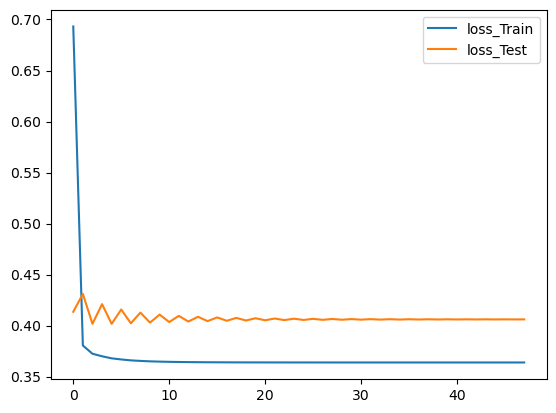

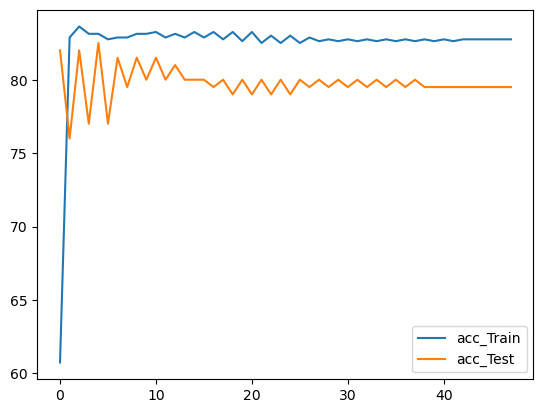

In [23]:
plt.plot(epochs , loss_T , label="loss_Train")
plt.plot(epochs , loss_Te , label="loss_Test")
plt.legend()
plt.figure()

plt.plot(epochs , acc_T , label="acc_Train")
plt.plot(epochs , acc_Te , label="acc_Test")
plt.legend()

### Visualize best weights

In [24]:
weights_df = pd.DataFrame(w_T[index].T,columns=["Bias" , "Age" , "AnnualSalary" , "Gender_Female" , "Gender_Male"])
weights_df

,Bias,Age,AnnualSalary,Gender_Female,Gender_Male
0,-0.898011,2.422624,1.270522,-0.007267,0.007267


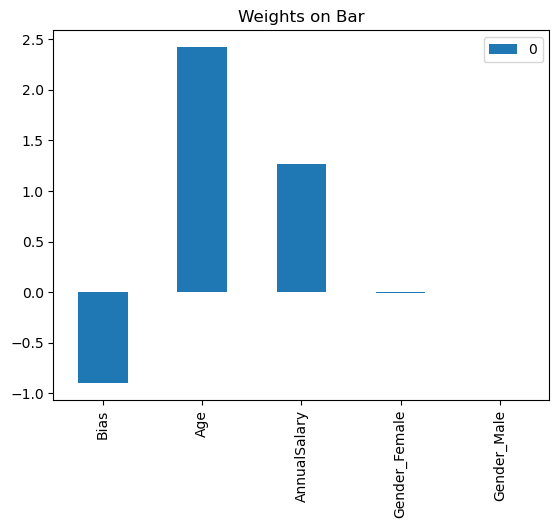

In [25]:
weights_df.T.plot(kind="bar" , title="Weights on Bar");

### Interpretation for weights

1.  `Bias`: -0.89801093

This negative bias term indicates the model initially leans towards predicting the non-purchasing class ("0") before considering any features.

2. `Age`: 2.42262357

This strongly positive weight signifies that a higher age significantly increases the probability of predicting a purchase. In simpler terms, as age increases, the model becomes more confident that the individual is likely to purchase. This suggests that older individuals in our dataset may be more inclined to make purchases, either due to increased financial stability or life stage factors.

3. `AnnualSalary`: 1.27052158

This positive weight shows that a higher annual salary moderately increases the probability of predicting a purchase. However, its value is smaller than the Age weight, suggesting that while income contributes to the prediction, it has a less significant influence compared to age.

4. `Gender Female`: -0.00726683

This nearly -zero value implies that being female compared to male has practically no influence on the purchase prediction. This could mean that gender plays a minimal role in this specific dataset or that the model cannot clearly distinguish its effect due to other factors like age and income.

5. `Gender Male`: 0.00726683

This near zero value mirrored for males reinforces the conclusion that gender has a negligible impact on the purchase prediction in this model.

### Loss and accuracy on Test data 

In [26]:
x_test_norm.shape , y_test.shape

((200, 4), (200, 1))

In [27]:
pred_prob = sigmoid(ones(x_test_norm).dot(w_T[index]))
y_hat = pred_prob.round()

In [28]:
acc_test = accuracy(y_hat , y_test)
print(f"The Accuracy on test data is : {acc_test}%")

The Accuracy on test data is : 82.5%


In [29]:
loss = cross_entropy(y_test , ones(x_test_norm) , w_T[index])
print(f"The Loss on the test data : {loss:}")

The Loss on the test data : 0.40169897788154374


## Question 2 

In [30]:
# Read data 
df = pd.read_csv("./data/cats.csv")
df.head()


,rownames,Gender,Bwt,Hwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  144 non-null    int64  
 1   Gender    144 non-null    object 
 2   Bwt       144 non-null    float64
 3   Hwt       144 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 4.6+ KB


### Preprocessing


In [32]:
df = df.drop(columns=["rownames"])

In [33]:
# Turn the Gender column to numerical values 
df.Gender = df.Gender.replace(["M","F"] , [1,0])


In [34]:
df.head()


,Gender,Bwt,Hwt
0,0,2.0,7.0
1,0,2.0,7.4
2,0,2.0,9.5
3,0,2.1,7.2
4,0,2.1,7.3


In [35]:
x_train , x_test , y_train , y_test = train_test_split(df.drop(columns=["Gender"]), df["Gender"] , test_size=0.2 , random_state=42)

In [36]:
std = StandardScaler()
x_train_norm = std.fit_transform(x_train)
x_test_norm = std.transform(x_test)

/home/amir/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


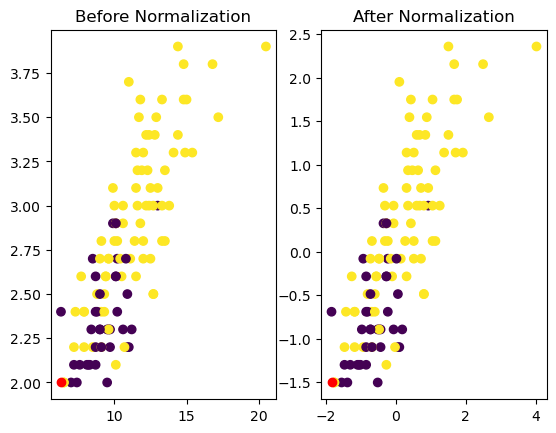

In [37]:
fig , ax = plt.subplots(1,2)
ax[0].set_title("Before Normalization")
ax[0].scatter(x = x_train.iloc[: , 1] , y = x_train.iloc[: , 0] , c = y_train)
point = (x_train.Hwt.min(),x_train.Bwt.min())
# print(point)
ax[0].scatter( point[0] , point[1], c = "r")
ax[1].set_title("After Normalization")
ax[1].scatter(x = x_train_norm[: , 1] , y = x_train_norm[: , 0] , c = y_train)
point_tr = std.transform(np.flip(np.expand_dims(point,axis=0))).squeeze()
# print(point_tr)
ax[1].scatter(point_tr[1],point_tr[0], c = "r");

As you can see every point transfrom in a constant manner and the distance between them are not change .  

In [38]:
C = np.logspace(-2 , 5 , 8)
C

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])

In [39]:
gamma = np.logspace(-6 , 1 , 16)
gamma

array([1.00000000e-06, 2.92864456e-06, 8.57695899e-06, 2.51188643e-05,
       7.35642254e-05, 2.15443469e-04, 6.30957344e-04, 1.84784980e-03,
       5.41169527e-03, 1.58489319e-02, 4.64158883e-02, 1.35935639e-01,
       3.98107171e-01, 1.16591440e+00, 3.41454887e+00, 1.00000000e+01])

### Prediction using `SVM`

In [40]:
from sklearn.svm import SVC


In [41]:
def grid_search(C , gamma ,kernel, x_train = x_train_norm , y_train = y_train , x_test = x_test_norm , y_test = y_test):
    best_acc = - np.inf
    
    for c in C :
        for g in gamma : 
            # Create Svm
            svm = SVC(C=c , gamma=g , kernel=kernel)
            # Fit Svm
            svm.fit(x_train , y_train)
            # Find accuracy
            acc = svm.score(x_train , y_train)
            if(best_acc < acc):
                best_acc = acc
                best_C = c
                best_gamma = g
                best_model = svm
                print(f"BEST -> C : {c} gamma : {g} accuracy : {acc}") 

    return best_acc , best_C , best_gamma , best_model


In [42]:
rbf_acc , rbf_c , rbf_gamma , rbf_model = grid_search(C , gamma , kernel="rbf")

BEST -> C : 0.01 gamma : 1e-06 accuracy : 0.6695652173913044
BEST -> C : 1.0 gamma : 0.04641588833612782 accuracy : 0.7565217391304347
BEST -> C : 1.0 gamma : 0.1359356390878527 accuracy : 0.7652173913043478
BEST -> C : 1.0 gamma : 0.3981071705534969 accuracy : 0.7913043478260869
BEST -> C : 1.0 gamma : 1.165914401179831 accuracy : 0.8173913043478261
BEST -> C : 1.0 gamma : 10.0 accuracy : 0.8782608695652174
BEST -> C : 10.0 gamma : 10.0 accuracy : 0.9217391304347826
BEST -> C : 100.0 gamma : 10.0 accuracy : 0.9565217391304348
BEST -> C : 1000.0 gamma : 10.0 accuracy : 0.9739130434782609


In [43]:
liner_acc , liner_c , liner_gamma , liner_model = grid_search(C , gamma , kernel="linear")

BEST -> C : 0.01 gamma : 1e-06 accuracy : 0.6695652173913044
BEST -> C : 0.1 gamma : 1e-06 accuracy : 0.7565217391304347
BEST -> C : 1.0 gamma : 1e-06 accuracy : 0.7739130434782608
BEST -> C : 10.0 gamma : 1e-06 accuracy : 0.7913043478260869


In [44]:
print(f"Best C {rbf_c} Best gamma {rbf_gamma} in rbf")

Best C 1000.0 Best gamma 10.0 in rbf


In [44]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

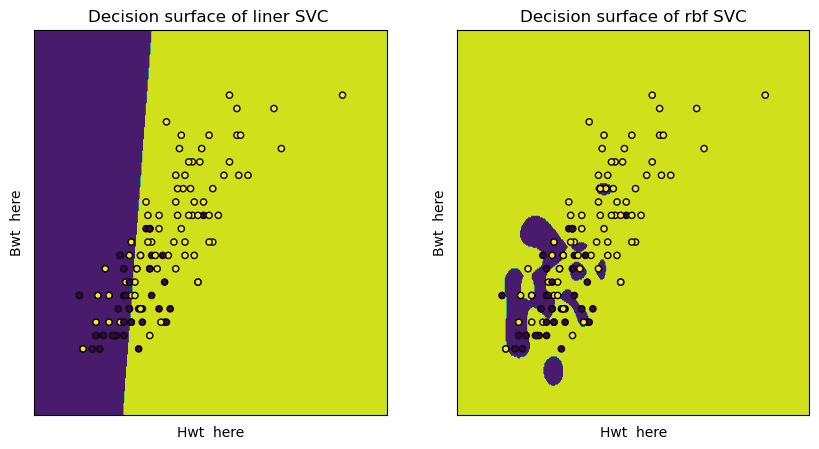

In [45]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
# title for the plots
plt.title("Accuracy on train data")
# Set-up grid for plotting.
X0, X1 = x_train_norm[:, 1], x_train_norm[:, 0]
xx, yy = make_meshgrid(X0, X1)
title = ('Decision surface of liner SVC ')
Z = liner_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[0].contourf(xx, yy, Z)
ax[0].scatter(X0, X1, c=y_train, s=20, edgecolors='k')
ax[0].set_ylabel('Bwt  here')
ax[0].set_xlabel('Hwt  here')
ax[0].set_xticks(())
ax[0].set_yticks(())
ax[0].set_title(title)
# ax[0].legend()

title = ('Decision surface of rbf SVC')
Z = rbf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z)
ax[1].scatter(X0, X1, c=y_train, s=20, edgecolors='k')
ax[1].set_ylabel('Bwt  here')
ax[1].set_xlabel('Hwt  here')
ax[1].set_xticks(())
ax[1].set_yticks(())
ax[1].set_title(title)
# ax[1].legend();
plt.show();

as you can see `rbf` clf is much better than linear clf

In [46]:
print(f"Best model accuracy on the test data {rbf_model.score(x_test_norm , y_test)}")

Best model accuracy on the test data 0.6551724137931034
